In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

HairCutBatch = pd.read_csv('Second_batch_hair.csv')

In [2]:
HairCutBatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tip amount  118 non-null    int64 
 1   Time        118 non-null    int64 
 2   Day         118 non-null    object
 3   Culture     118 non-null    object
 4   Married     118 non-null    object
 5   Age         118 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 5.7+ KB


In [3]:
HairCutBatch.describe().T

,count,mean,std,min,25%,50%,75%,max
Tip amount,118.0,6.830508,5.843113,0.0,4.0,5.0,7.0,40.0
Time,118.0,13.372881,2.571363,1.0,11.0,13.0,15.0,19.0
Age,118.0,30.610169,10.920876,3.0,25.0,30.0,40.0,55.0


In [4]:
HairCutBatch.head()

,Tip amount,Time,Day,Culture,Married,Age
0,20,10,mon,P,NM,30
1,5,11,mon,W,NM,16
2,5,11,mon,E,M,40
3,3,11,Fri,M,M,40
4,6,11,Fri,W,NM,30


In [5]:
HairCutBatch = HairCutBatch[HairCutBatch['Tip amount'].notnull()]

In [6]:
HairCutBatch.groupby('Married')['Tip amount'].mean()

Married
M     6.435897
NM    7.025316
Name: Tip amount, dtype: float64

## This one is plotting the tip amount agains age of customers and culture

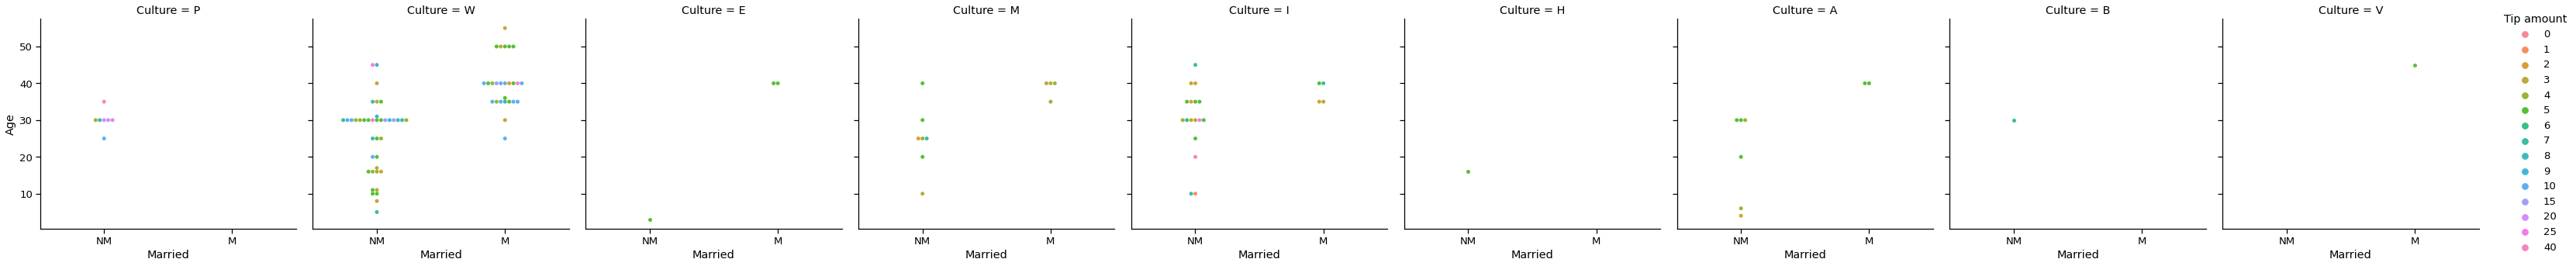

In [7]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Age',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

## This one is plotting the tip amount against culture

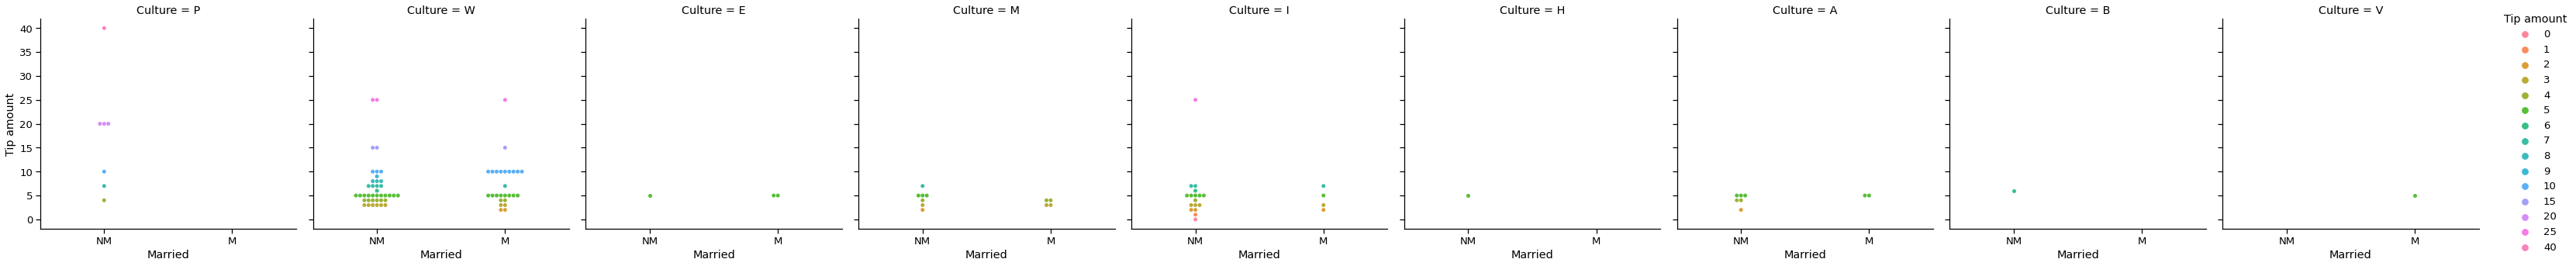

In [8]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Tip amount',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

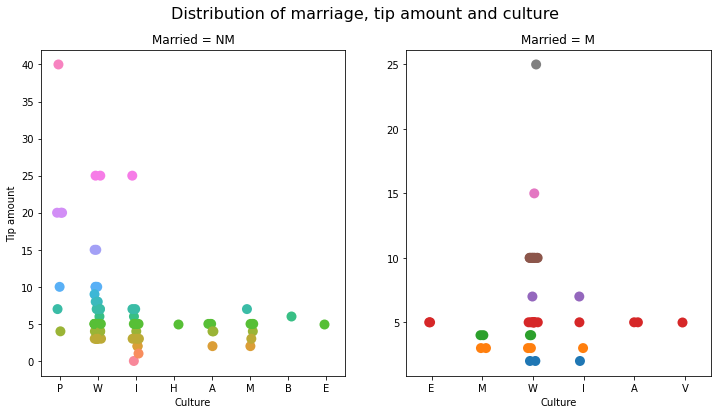

In [9]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Tip amount',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

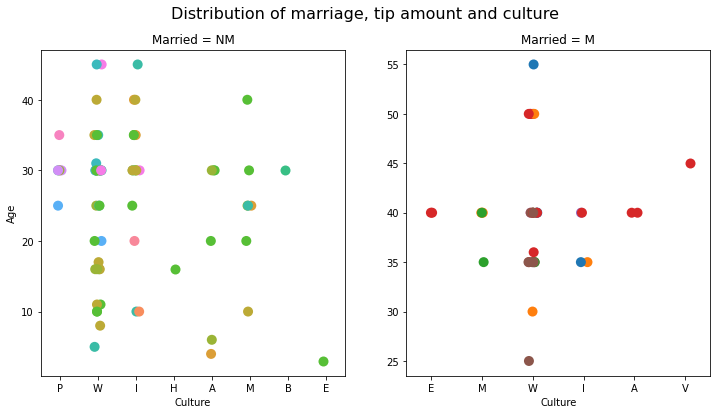

In [10]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Age',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

## Finding the highest tipping time of week

In [11]:
HeatplotDay = pd.pivot_table(HairCutBatch, values="Tip amount", index=['Day'], columns=['Time'])
HeatplotDay.head(100)

Time,1,10,11,12,13,14,15,16,17,18,19
Day,,,,,,,,,,,
Fri,NaN,7.000000,5.400000,5.666667,6.333333,10.0,NaN,5.000000,NaN,NaN,NaN
Mon,NaN,NaN,NaN,4.500000,10.500000,4.0,3.833333,4.666667,7.00,15.0,NaN
Sat,10.0,5.666667,5.857143,4.250000,3.625000,9.2,3.833333,9.500000,4.75,7.0,NaN
Thur,NaN,7.000000,5.000000,7.000000,6.000000,4.0,NaN,NaN,NaN,NaN,NaN
Tue,NaN,4.000000,5.500000,NaN,4.000000,5.0,7.500000,22.500000,7.00,16.5,5.0
Tues,NaN,NaN,NaN,5.000000,3.000000,10.0,20.000000,NaN,NaN,NaN,NaN
Wed,NaN,12.500000,4.000000,7.500000,7.000000,NaN,20.000000,NaN,NaN,NaN,NaN
mon,NaN,20.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Time', ylabel='Day'>

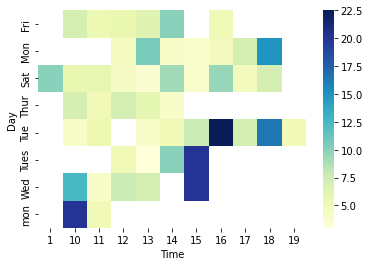

In [12]:
sns.heatmap(HeatplotDay, cmap="YlGnBu")

In [13]:
HairCutBatch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tip amount  118 non-null    int64 
 1   Time        118 non-null    int64 
 2   Day         118 non-null    object
 3   Culture     118 non-null    object
 4   Married     118 non-null    object
 5   Age         118 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.5+ KB


In [14]:
HairCutBatch.head(3)

,Tip amount,Time,Day,Culture,Married,Age
0,20,10,mon,P,NM,30
1,5,11,mon,W,NM,16
2,5,11,mon,E,M,40


# Tip amount 'mean' by day

In [15]:
HairCutBatch.groupby('Day')['Tip amount'].mean()

Day
Fri      6.333333
Mon      6.250000
Sat      5.744186
Thur     6.000000
Tue      9.125000
Tues     9.500000
Wed      8.300000
mon     10.000000
Name: Tip amount, dtype: float64

# Count of number of tips per day

In [16]:
HairCutBatch.groupby('Day')['Tip amount'].count()

Day
Fri     15
Mon     20
Sat     43
Thur     7
Tue     16
Tues     4
Wed     10
mon      3
Name: Tip amount, dtype: int64

# Tip amounts grouped by time

In [17]:
HairCutBatch.groupby('Time')['Tip amount'].sum()

Time
1      10
10     80
11    110
12     77
13    116
14     98
15    101
16    102
17     47
18     55
19     10
Name: Tip amount, dtype: int64

# Correlation of 'tip amount' to 'age'

In [18]:
np.corrcoef(HairCutBatch['Age'], HairCutBatch['Tip amount'])[0,1]

0.13088725173493654

# Age vs Tip Amount vs Culture

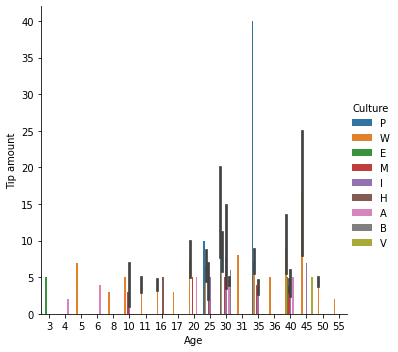

In [19]:
ax = sns.catplot(x='Age', y='Tip amount', hue="Culture", kind='bar', data=HairCutBatch,)

# Day vs Tip Amount vs Culture

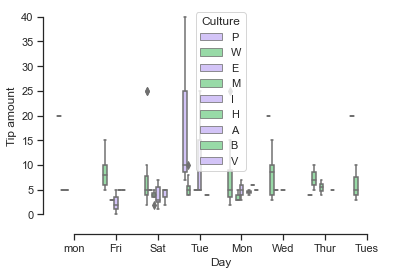

In [20]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Day", y="Tip amount", hue="Culture", palette=["m", "g"], data=HairCutBatch)
sns.despine(offset=10, trim=True)

# Conditional Means with Observations

<AxesSubplot:xlabel='Age', ylabel='Tip amount'>

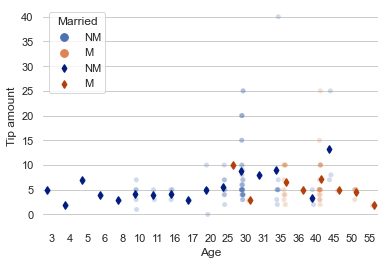

In [21]:
# set the theme
sns.set_theme(style="whitegrid")

# melt the data set
pd.melt(HairCutBatch, "Married", var_name="Tip amount")

# initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# show each observation with a scatterplot
sns.stripplot(x="Age", y="Tip amount", hue="Married", data=HairCutBatch, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="Age", y="Tip amount", hue="Married", data=HairCutBatch, dodge=.8 - .8 / 3, join=False, palette="dark", markers="d", scale=.75, ci=None)

# Multivariate bivariate KDE pl

/Users/graemecassidyclark/Documents/py-env/aai/lib/python3.8/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Age', ylabel='Tip amount'>

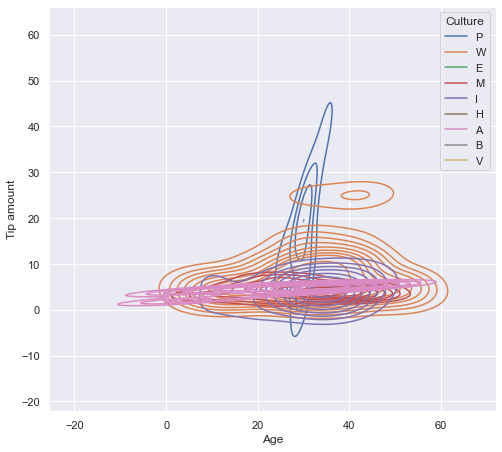

In [22]:
sns.set_theme(style="darkgrid")

# setup figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot
sns.kdeplot(data=HairCutBatch, x="Age", y="Tip amount", hue="Culture", thresh=.1,)

# Lineplot Test

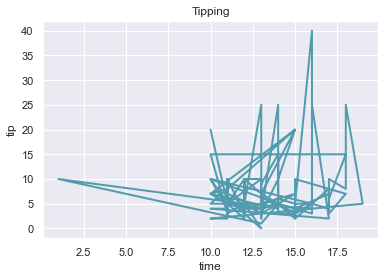

In [23]:
x_data = HairCutBatch['Time']
y_data = HairCutBatch['Tip amount']
def lineplot(x_data, y_data, x_label="time", y_label="tip", title="Tipping"):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
lineplot(x_data, y_data)

# Test for Bar Chart

/Users/graemecassidyclark/Documents/py-env/aai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


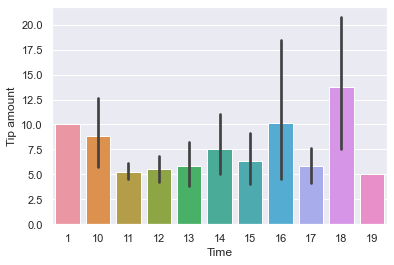

In [24]:
sns.set_style('darkgrid')
x = HairCutBatch['Time']
y = HairCutBatch['Tip amount']

sns.barplot(x, y)
plt.show()

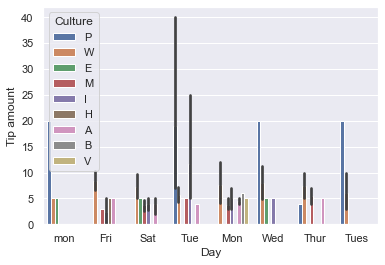

In [25]:
dataset = HairCutBatch
sns.barplot(x = "Day", y = "Tip amount", hue = "Culture", data = dataset)
plt.show()

In [26]:
print(HairCutBatch.head())

   Tip amount  Time  Day Culture Married  Age
0          20    10  mon       P      NM   30
1           5    11  mon       W      NM   16
2           5    11  mon       E       M   40
3           3    11  Fri       M       M   40
4           6    11  Fri       W      NM   30


# Married vs Tip Amount

/Users/graemecassidyclark/Documents/py-env/aai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


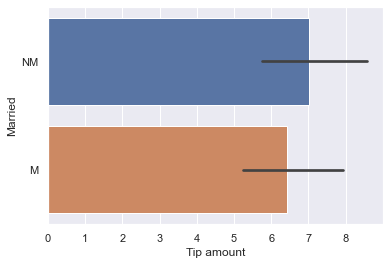

In [27]:
dataset = HairCutBatch
y = dataset['Tip amount']
x = dataset['Married']
sns.barplot(y, x, data = dataset)
plt.show()

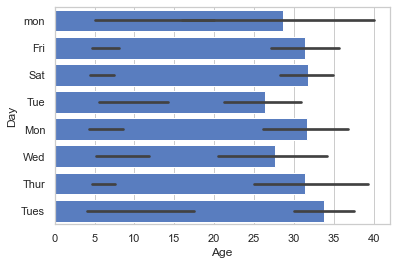

In [28]:
sns.set_theme(style="whitegrid")
dataset = HairCutBatch

# y = dataset['Tip amount']
# x = dataset['Married']
sns.set_color_codes("pastel")
sns.barplot(x="Tip amount", y="Day", data = dataset, label="Tips", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Age", y="Day", data = dataset, label="Culture", color="b")
# sns.barplot(y, x, data = dataset)
plt.show()

# Histogram for Cuture against Tip Amount

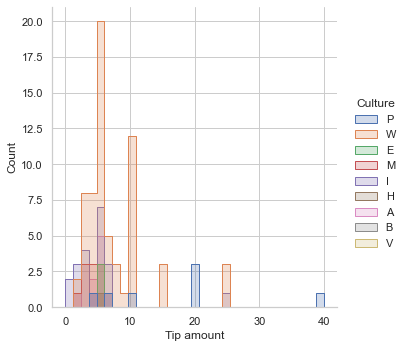

In [29]:
dataset = HairCutBatch
# sns.displot(dataset, x="Culture", binwidth=20)
# sns.displot(dataset, x="Day", discrete=True)
# sns.displot(dataset, x="Tip amount", shrink=.8)
sns.displot(dataset, x="Tip amount", hue="Culture", element="step")

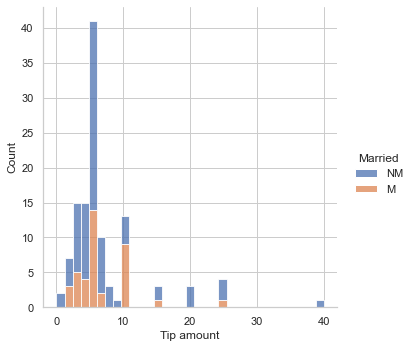

In [30]:
dataset = HairCutBatch
# sns.displot(dataset, x="Culture", binwidth=20)
# sns.displot(dataset, x="Day", discrete=True)
# sns.displot(dataset, x="Tip amount", shrink=.8)
sns.displot(dataset, x="Tip amount", hue="Married", multiple="stack")

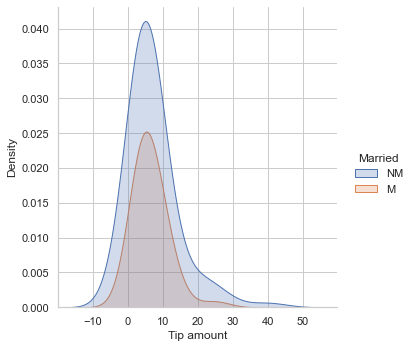

In [31]:
dataset = HairCutBatch
sns.displot(dataset, x="Tip amount", hue="Married", kind="kde", bw_adjust=2, fill=True)

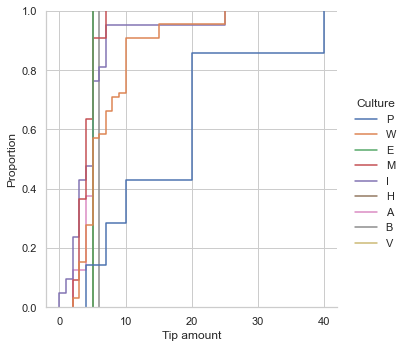

In [32]:
dataset = HairCutBatch
sns.displot(dataset, x="Tip amount", hue="Culture", kind="ecdf")

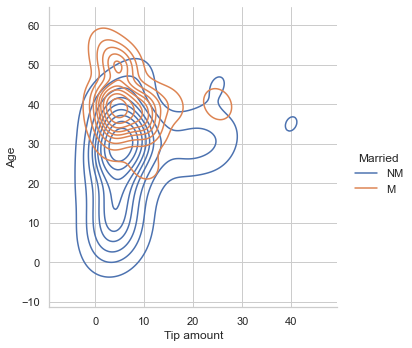

In [33]:
dataset = HairCutBatch
sns.displot(dataset, x="Tip amount", y="Age", hue="Married", kind="kde")

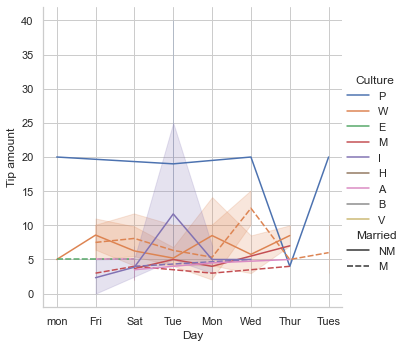

In [46]:
dataset = HairCutBatch
sns.relplot(x="Day", y="Tip amount", hue="Culture", style="Married", kind="line", data=dataset);